## T2

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


df = pd.read_excel(r"C:\Users\ASUS\Desktop\Q HARDWARE\NMR\T2.xlsx")


In [4]:
df

,f1 (MHz),f2 (MHz),T1 (us),deltaT (us),pulse echo (mV),Unnamed: 5,SCALE (mV/div)
0,24.3077,24.344,200.0,3000,61.7,NaN,10.0
1,NaN,NaN,NaN,3700,61.3,NaN,NaN
2,NaN,NaN,NaN,4500,60.8,NaN,NaN
3,NaN,NaN,NaN,5000,60.0,NaN,NaN
4,NaN,NaN,NaN,5700,59.7,NaN,NaN
5,NaN,NaN,NaN,8700,56.0,NaN,NaN
6,NaN,NaN,NaN,10800,52.3,NaN,NaN
7,NaN,NaN,NaN,13400,48.5,NaN,NaN
8,NaN,NaN,NaN,16600,40.7,NaN,NaN
9,NaN,NaN,NaN,20600,37.0,NaN,NaN


In [5]:
x = df["deltaT (us)"]
y = df["pulse echo (mV)"]

C:\Users\ASUS\AppData\Local\Temp\ipykernel_21696\1127746129.py:16: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "." (-> marker='.'). The keyword argument will take precedence.
  plt.errorbar(x_fit, y_lin, yerr=yerr, marker='+', color="red", fmt=".")


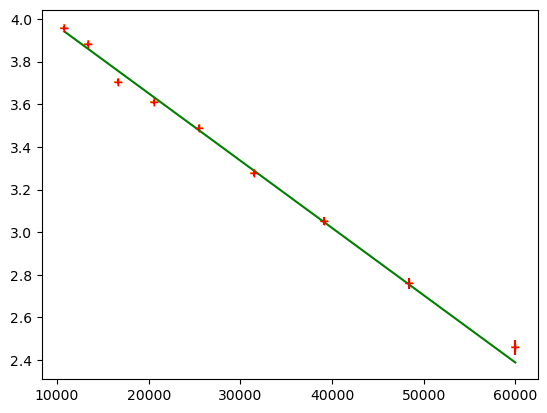

In [8]:
#exponential fit
from scipy.optimize import curve_fit

x_fit = x[6:]
#linearizing data
y_lin = np.log(y[6:])

yerr=(1/y[6:])*(10/(10*np.sqrt(6)))

popt, pcov = curve_fit(lambda x,m,q: m*x+q , x_fit , y_lin, sigma=yerr, absolute_sigma=True)

slope,q = popt
sigma_slope, sigma_q = np.sqrt(np.diag(pcov))

plt.scatter(x_fit, y_lin, marker='+', color="orange")
plt.errorbar(x_fit, y_lin, yerr=yerr, marker='+', color="red", fmt=".")
X=np.linspace(min(x_fit)-0.00005, max(x_fit)+0.00005, 10)
plt.plot(X, q + slope*X, color="green")



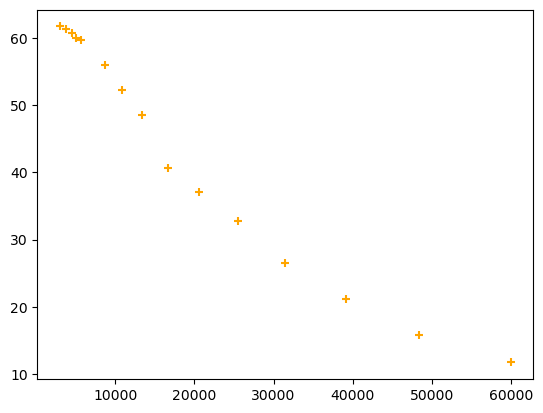

In [13]:
plt.scatter(x, y, marker='+', color="orange")


In [12]:
T2 = -1/slope
err = (1/(slope**2))*sigma_slope
print("T2: ", T2*10**-3,  "ms +- ", err*10**-3)




T2:  31.68705561073418 ms +-  0.3993903106657274
